<a href="https://colab.research.google.com/github/vdnghia03/Deep-Learning/blob/main/DL01_MLP_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## Multilayered perceptron (MLP) for classification
---

Read more:
- [How many nodes and layers? - DigitalSreeni](https://www.youtube.com/watch?v=bqBRET7tbiQ)
- [Adam optimizer - wikipedia](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam)
- [Cross-entropy - wikipedia](https://en.wikipedia.org/wiki/Cross_entropy)
- [Cross-entropy - machinelearningmastery](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)
- [None in model - stackoverflow](https://stackoverflow.com/questions/47240348/what-is-the-meaning-of-the-none-in-model-summary-of-keras)
- [EarlyStopping - Keras](https://keras.io/api/callbacks/early_stopping/)
- [Adam optimization algorithm - Andrew Ng](https://www.youtube.com/watch?v=JXQT_vxqwIs)

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

plt.style.use("seaborn-v0_8-white")
raw_data = load_breast_cancer()


(array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
         3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
         8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
         3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
         1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
         8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
         3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
         1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
         1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
         1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
         4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
         2.250e-02, 4.5

In [6]:
raw_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Bộ dữ liệu "Breast Cancer Wisconsin (Diagnostic)" là một tập dữ liệu phổ biến được sử dụng trong học máy để phân loại khối u ung thư vú là lành tính (benign) hoặc ác tính (malignant).


In [ ]:

# 'mean radius': 'Bán kính trung bình',
# 'mean texture': 'Kết cấu trung bình',
# 'mean perimeter': 'Chu vi trung bình',
# 'mean area': 'Diện tích trung bình',
# 'mean smoothness': 'Độ mịn trung bình',
# 'mean compactness': 'Độ chặt trung bình',
# 'mean concavity': 'Độ lõm trung bình',
# 'mean concave points': 'Số điểm lõm trung bình',
# 'mean symmetry': 'Độ đối xứng trung bình',
# 'mean fractal dimension': 'Kích thước fractal trung bình',
# 'radius error': 'Sai số bán kính',
# 'texture error': 'Sai số kết cấu',
# 'perimeter error': 'Sai số chu vi',
# 'area error': 'Sai số diện tích',
# 'smoothness error': 'Sai số độ mịn',
# 'compactness error': 'Sai số độ chặt',
# 'concavity error': 'Sai số độ lõm',
# 'concave points error': 'Sai số số điểm lõm',
# 'symmetry error': 'Sai số độ đối xứng',
# 'fractal dimension error': 'Sai số kích thước fractal',
# 'worst radius': 'Bán kính tệ nhất (lớn nhất)',
# 'worst texture': 'Kết cấu tệ nhất (lớn nhất)',
# 'worst perimeter': 'Chu vi tệ nhất (lớn nhất)',
# 'worst area': 'Diện tích tệ nhất (lớn nhất)',
# 'worst smoothness': 'Độ mịn tệ nhất (lớn nhất)',
# 'worst compactness': 'Độ chặt tệ nhất (lớn nhất)',
# 'worst concavity': 'Độ lõm tệ nhất (lớn nhất)',
# 'worst concave points': 'Số điểm lõm tệ nhất (lớn nhất)',
# 'worst symmetry': 'Độ đối xứng tệ nhất (lớn nhất)',
# 'worst fractal dimension': 'Kích thước fractal tệ nhất (lớn nhất)'


In [8]:

X = raw_data.data
y = raw_data.target

X[:2], y[:2]

(array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
         3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
         8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
         3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
         1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
         8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
         3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
         1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
         1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02]]),
 array([0, 0]))

In [9]:
data_pd = pd.DataFrame(X, columns = raw_data.feature_names)
data_pd["target"] = y

data_pd.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<Axes: xlabel='target'>

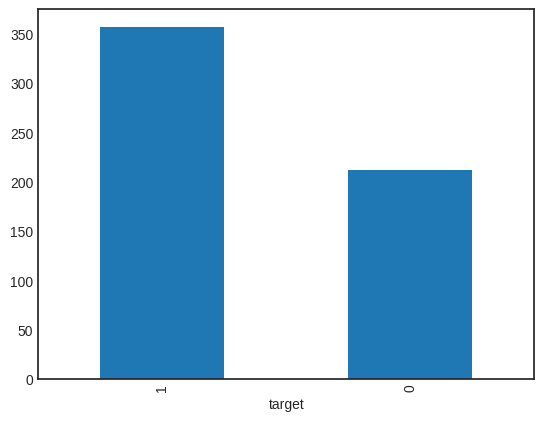

In [18]:
data_pd["target"].value_counts().plot(kind="bar")

> Nhan xet: Bo du lieu nay ve y te, khong hieu ro nhieu ve bo du lieu nay. No co 30 feature va 1 target de du doan ung thu vu la lanh tinh hay ac tinh. Bo du lieu nay khong co du lieu null hay missing data



In [11]:
print(np.isnan(X).any())
print(X.shape, y.shape)

False
(569, 30) (569,)


### Train|val|test split and scaling

Note that for this dataset, as it is small be smart to use
**k-fold cross-validation** for hyperparameter tuning, but I go with **train|val|test** split for simplicity

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Fit transform data with Scaler
scaled_X_train_val = scaler.fit_transform(X_train_val)
scaled_X_val   = scaler.transform(X_val)
scaled_X_test  = scaler.transform(X_test)

# note that this one will be used in the end and thus can use all training data for scaling
scaled_X_train = scaler.fit_transform(X_train)


print("X_train, X_val, X_test")
print(scaled_X_train_val.shape, scaled_X_val.shape, scaled_X_test.shape)



X_train, X_val, X_test
(410, 30) (73, 30) (86, 30)


---
### NLP network

An multilayered perceptron (MLP) network is deep, if it has ≥2 hidden layers. It is a feedforward network, which means that the input is going forward into next layer, which is moving forward to its next layer and so on until we get an output. Basically one hidden layer is enough for a network to approximate any continous function by carving up the input space with many linear functions. However by adding more hidden layers we get function compositions, i.e. functions of other functions, which easier can represent more advanced structures of the data.

Unfortunately there is no mathematical formula that tells us how many nodes and hidden layers to use. In short, the best we can do is by trial and error. There are however some methods for building networks, as we can test on validation data:

- grow a network from nothing, slowly adding nodes and layers
- pruning - start from a large network and remove nodes and layers
- global search - use a genetic algorithm to test out several network configurations
- regularization - keep the network small by constraining the magnitude of the weights
- early stopping - the more the network trains the better it gets at fitting the training data, so we can stop it before it starts to overfit

The idea is to have a network that is complex enough to fit the training data and not too complex such that it overfits it and generalizes badly within its coverage regions.

---
#### Binary cross-entropy loss function

The loss function we will use for the binary classification problem is the binary cross-entropy. This loss function $\mathcal{L}$ is basically a measure of how different two probability distributions are from each other for a random variable. As we can view the response (target) variable $y$ and the predicted variable $\hat{y}$ as a probability distributions, we can see how different they are from each other and penalize this difference in gradient descent.

$$
\mathcal{L} = -\frac{1}{n} \sum_{i=1}^{n} y_i \ln \hat{y}_i + (1 - y_i) \ln (1 - \hat{y}_i)
$$

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense

def MLP_model():
  model = Sequential(name = "MLP_initial")
  model.add(InputLayer(input_shape=(X.shape[1],), name="Input Layer"))
  model.add(Dense(30, name = "Hitden_layer1", activation = "relu"))
  model.add(Dense(30, name = "Hitden_layer2", activation = "relu"))
  # binary cross entropy
  model.add(Dense(1, name = "Output_layer", activation = "sigmoid"))

  model.compile(loss = "binary_crossentropy", optimizer = "adam")
  return model

model = MLP_model()

# the output shape None means the batch size and is automatically defined in fit or predict
# number of trainable params  (30+1)*30 + (30+1)*30+31 = 1891
model.summary()

Model: "MLP_initial"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hitden_layer1 (Dense)           │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hitden_layer2 (Dense)           │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,891 (7.39 KB)

 Trainable params: 1,891 (7.39 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# We train it verly long to observe overfitting
model.fit(scaled_X_train_val, y_train_val, epochs = 1000, validation_data=(scaled_X_val, y_val), verbose=0)

<Axes: title={'center': 'Training and validation loss'}, xlabel='Epochs', ylabel='Cross-entropy loss'>

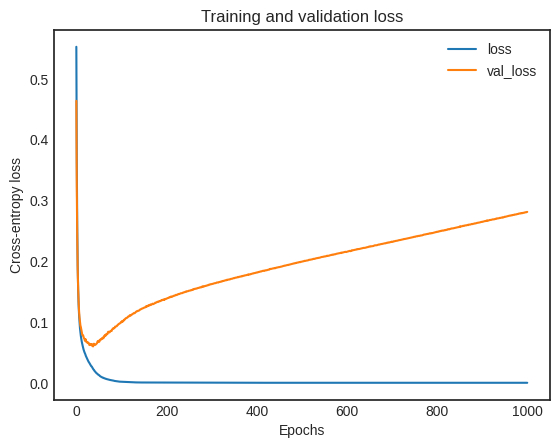

In [24]:
pd.DataFrame(model.history.history).plot(
    xlabel = "Epochs"
    , ylabel = "Cross-entropy loss"
    , title = "Training and validation loss"
)

# clearly see overfitting here as the validation loss increases, while training loss decreases
# this means the model can't generalize to data it hasn't seen
# actually our model seems to overfit very early, indicating that we need to have a less complex model

---
#### Eearly stopping
We can simple choose to stop the model before the validation loss increases. This is basically a free lunch

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

# don't stop immediately -> stop after 15
# min mode -> stop when quantity monitored stopped decreasing
early_stopper = EarlyStopping(monitor = "val_loss", mode = "min", patience = 15)

# note that we have to redefine the model, else it will continue training on the previous model
model = MLP_model()

model.fit(scaled_X_train_val, y_train_val, epochs= 1000
          , validation_data = [scaled_X_val, y_val], callbacks=[early_stopper], verbose=1)


Epoch 1/1000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.5245 - val_loss: 0.3622
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3329 - val_loss: 0.2508
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2433 - val_loss: 0.1898
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1717 - val_loss: 0.1558
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1493 - val_loss: 0.1340
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1398 - val_loss: 0.1184
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1244 - val_loss: 0.1066
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0931 - val_loss: 0.0980
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0886 - val_loss: 0.0909
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0859 - val_loss: 0.0840
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0746 - val_loss: 0.0801
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 

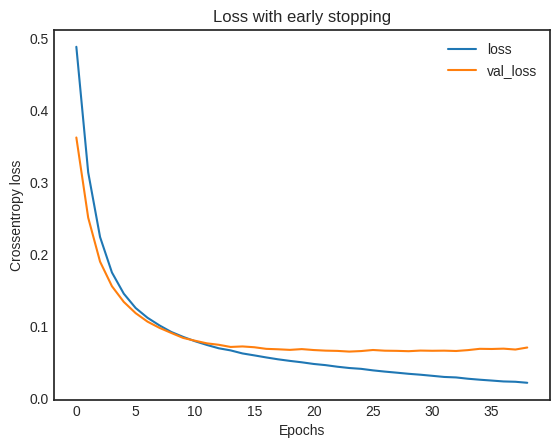

In [28]:

# this is much better
df_loss = pd.DataFrame(model.history.history)
df_loss.plot(xlabel="Epochs",
             ylabel="Crossentropy loss", title="Loss with early stopping");

# To improve on this we should simplify the network more to get validation loss closer to training loss.


In [29]:
# Improve model using regularizer to simply for network

from tensorflow.keras.regularizers import l2

def MLP_model_regularized():
  model = Sequential(name = "MLP_regularized")
  model.add(InputLayer(input_shape=(X.shape[1],), name="Input Layer"))
  model.add(Dense(30, name = "Hidden_layer1", activation = "relu", kernel_regularizer=l2(0.001)))
  model.add(Dense(30, name = "Hidden_layer2", activation = "relu", kernel_regularizer=l2(0.001)))
  model.add(Dense(1, name = "Output_layer", activation = "sigmoid"))

  model.compile(loss = "binary_crossentropy", optimizer = "adam")
  return model

model_regularized = MLP_model_regularized()
model_regularized.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "MLP_regularized"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_layer1 (Dense)           │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer2 (Dense)           │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,891 (7.39 KB)

 Trainable params: 1,891 (7.39 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Fit model and draw plot
early_stopper = EarlyStopping(monitor = "val_loss", mode = "min", patience = 15)

model_regularized.fit(scaled_X_train_val, y_train_val, epochs= 1000
          , validation_data = [scaled_X_val, y_val], callbacks=[early_stopper], verbose=1)


Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.6495 - val_loss: 0.5650
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5224 - val_loss: 0.4453
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4155 - val_loss: 0.3512
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3140 - val_loss: 0.2827
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2398 - val_loss: 0.2391
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1943 - val_loss: 0.2090
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1912 - val_loss: 0.1868
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1595 - val_loss: 0.1724
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1556 - val_loss: 0.1617
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1352 - val_loss: 0.1541
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1455 - val_loss: 0.1457
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms

<Axes: title={'center': 'Loss with early stopping using regulization L2'}, xlabel='Epochs', ylabel='Crossentropy loss'>

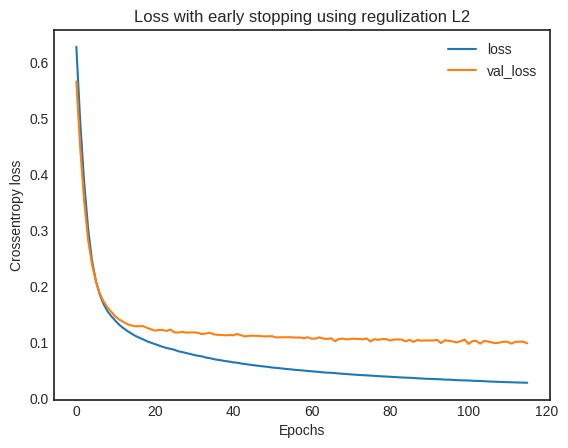

In [31]:
df_loss_l2 = pd.DataFrame(model_regularized.history.history)
df_loss_l2.plot(xlabel="Epochs",
             ylabel="Crossentropy loss", title="Loss with early stopping using regulization L2")

---
### Predict and Evaluation
- note that we changed the number of epochs, which is a hyperparameter tuning
- we did this on the validation data which is okay, we don't have data leakage
- before prediction we will utilize all training data, i.e. training and evaluation
- then predict on test data

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

model = MLP_model()

# model fit needs to have same shapes
print(scaled_X_train.shape, y_train.shape, y_train[:,None].shape)

model.fit(scaled_X_train, y_train[:,None], epochs=len(df_loss),
          validation_data=[scaled_X_test, y_test], callbacks=[early_stopper], verbose=0)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


(483, 30) (483,) (483, 1)


<Axes: title={'center': 'Loss with early stopping'}, xlabel='Epochs', ylabel='Crossentropy loss'>

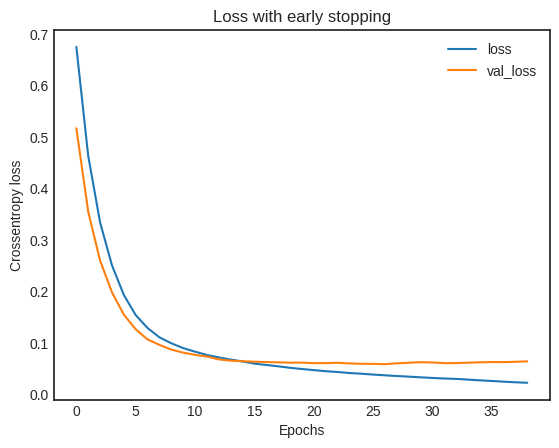

In [35]:
final_loss = pd.DataFrame(model.history.history)
final_loss.plot(xlabel="Epochs",
             ylabel="Crossentropy loss", title="Loss with early stopping")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[9.5539886e-01]
 [4.2971937e-05]
 [8.7887229e-04]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.96      1.00      0.98        54

    accuracy                           0.98        86
   macro avg       0.98      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86



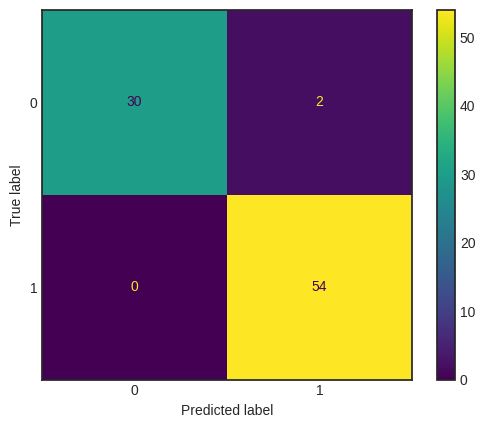

In [36]:


y_pred = model.predict(scaled_X_test)
print(y_pred[:3]) # probabilities due to sigmoid activation function

y_pred = np.round(y_pred)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred))